In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
countypres_df = pd.read_csv("countypres_2000-2020.csv")


In [4]:
countypres_df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL


In [46]:
countyclass_df = pd.read_csv("CountyClassifications.csv", encoding='latin',sep='\t',dtype={"FIPStxt": int})

In [47]:
countyclass_df.head()

,FIPStxt,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
countyclass_df.to_csv("countyclassClean.csv", encoding="utf-8") 

In [49]:
countyclassClean_df = pd.read_csv("countyclassClean.csv")

In [50]:
countyclassClean_df.head()

,Unnamed: 0,FIPStxt,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
rStates = ['PR','AK','HI']
countypres2016_df = countypres_df[countypres_df.year.eq(2016) & countypres_df.party.eq('DEMOCRAT') & ~countypres_df.state_po.isin(rStates) & ~countypres_df.totalvotes.eq(0)]


In [52]:
len(countypres2016_df.index)

3113

In [53]:
def percentage_dem(row):
    return(row['candidatevotes']/row['totalvotes'])

countypres2016_df.apply(lambda row: percentage_dem(row), axis=1)

40517    0.237697
40520    0.193856
40523    0.465278
40526    0.212496
40529    0.084258
           ...   
49856    0.084799
49859         NaN
49860    0.596717
49861    0.125989
50521    0.054193
Length: 3113, dtype: float64

In [54]:
percentSeries = countypres2016_df.apply(lambda row: percentage_dem(row), axis=1)

countypres2016_df = countypres2016_df.assign(percentageVotedDemocrat=percentSeries.values) 

In [55]:
len(countypres2016_df[countypres2016_df['percentageVotedDemocrat'].notna()])


3112

In [56]:
countypres2016_df = countypres2016_df[countypres2016_df['percentageVotedDemocrat'].notna()]


In [57]:
countypres2016_df.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,percentageVotedDemocrat
40517,2016,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,5936.0,24973.0,20191203,TOTAL,0.237697
40520,2016,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,18458.0,95215.0,20191203,TOTAL,0.193856
40523,2016,ALABAMA,AL,BARBOUR,1005.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,4871.0,10469.0,20191203,TOTAL,0.465278
40526,2016,ALABAMA,AL,BIBB,1007.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,1874.0,8819.0,20191203,TOTAL,0.212496
40529,2016,ALABAMA,AL,BLOUNT,1009.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,2156.0,25588.0,20191203,TOTAL,0.084258


In [61]:
countypres2016_df = countypres2016_df[countypres2016_df['county_fips'].notna()]

countypres2016_df = countypres2016_df.astype({"county_fips": int})
len(countypres2016_df)

3110

In [64]:
rdf = pd.merge(countypres2016_df, countyclassClean_df, left_on='county_fips',right_on='FIPStxt', how="left")
len(result)


3110

In [65]:
rdf.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,2016,ALABAMA,AL,AUTAUGA,1001,PRESIDENT,HILLARY CLINTON,DEMOCRAT,5936.0,24973.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2016,ALABAMA,AL,BALDWIN,1003,PRESIDENT,HILLARY CLINTON,DEMOCRAT,18458.0,95215.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016,ALABAMA,AL,BARBOUR,1005,PRESIDENT,HILLARY CLINTON,DEMOCRAT,4871.0,10469.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,2016,ALABAMA,AL,BIBB,1007,PRESIDENT,HILLARY CLINTON,DEMOCRAT,1874.0,8819.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2016,ALABAMA,AL,BLOUNT,1009,PRESIDENT,HILLARY CLINTON,DEMOCRAT,2156.0,25588.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='RuralUrbanContinuumCode2013', ylabel='percentageVotedDemocrat'>

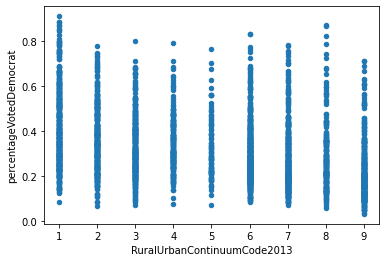

In [88]:
rdf.plot.scatter('RuralUrbanContinuumCode2013','percentageVotedDemocrat')

<AxesSubplot:xlabel='RuralUrbanContinuumCode2013', ylabel='percentageVotedDemocrat'>

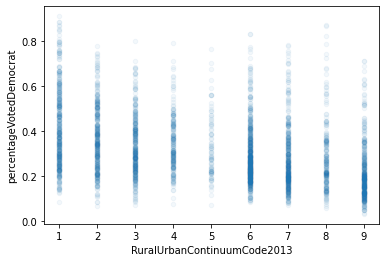

In [73]:
rdf.plot.scatter('RuralUrbanContinuumCode2013','percentageVotedDemocrat',alpha=0.05)

<AxesSubplot:xlabel='RuralUrbanContinuumCode2013', ylabel='percentageVotedDemocrat'>

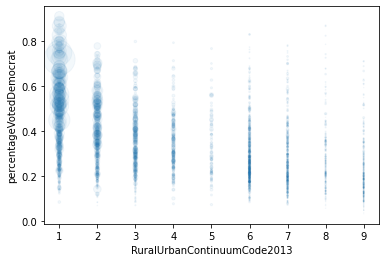

In [87]:
rdf.plot.scatter('RuralUrbanContinuumCode2013','percentageVotedDemocrat',alpha=0.05,s=rdf.totalvotes/(max(rdf.totalvotes)/1000))
                 

<AxesSubplot:xlabel='RuralUrbanContinuumCode2013', ylabel='percentageVotedDemocrat'>

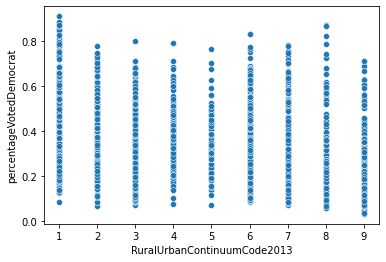

In [70]:
sns.scatterplot(x="RuralUrbanContinuumCode2013", y="percentageVotedDemocrat", data=rdf)


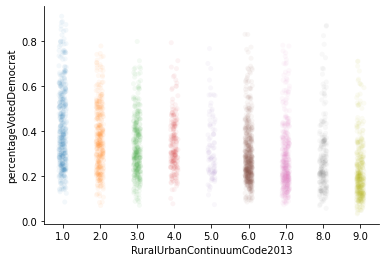

In [76]:
sns.stripplot(x='RuralUrbanContinuumCode2013', y='percentageVotedDemocrat', data=rdf, jitter=True, alpha=0.05)
sns.despine()

<AxesSubplot:xlabel='RuralUrbanContinuumCode2013', ylabel='percentageVotedDemocrat'>

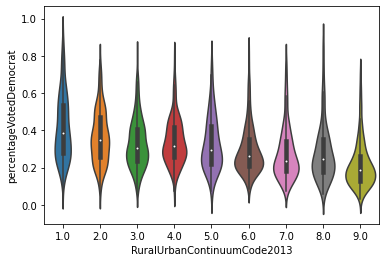

In [77]:
sns.violinplot(x='RuralUrbanContinuumCode2013', y='percentageVotedDemocrat', data=rdf)


In [80]:
max(rdf.totalvotes)

3434308.0

In [90]:

def candidateVotesRuralHelper(row):
    if row['RuralUrbanContinuumCode2013'] > 3:
        v = row['candidatevotes']
    else:    
        v = 0
    return(v)

def totalVotesRuralHelper(row):
    if row['RuralUrbanContinuumCode2013'] > 3:
        v = row['totalvotes']
    else:    
        v = 0
    return(v)


smallCVotesSeries = rdf.apply(lambda row: candidateVotesRuralHelper(row), axis=1)
smallTVotesSeries = rdf.apply(lambda row: totalVotesRuralHelper(row), axis=1)

rdf = rdf.assign(smallMetroOrSmallerCandidateVotes=smallCVotesSeries.values) 
rdf = rdf.assign(smallMetroOrSmallerTotalVotes=smallTVotesSeries.values) 

In [91]:
stateGroupby = rdf.groupby(['state'])

In [93]:
stateGroupby.ngroups

50

In [94]:

 
stateGroupby.candidatevotes.sum()

state
ALABAMA                  729547.0
ALASKA                      274.0
ARIZONA                 1161167.0
ARKANSAS                 380494.0
CALIFORNIA              8753788.0
COLORADO                1338870.0
CONNECTICUT              897572.0
DELAWARE                 235603.0
DISTRICT OF COLUMBIA     282830.0
FLORIDA                 4504975.0
GEORGIA                 1877963.0
IDAHO                    189765.0
ILLINOIS                3090729.0
INDIANA                 1033126.0
IOWA                     653669.0
KANSAS                   427005.0
KENTUCKY                 628854.0
LOUISIANA                780154.0
MAINE                    354718.0
MARYLAND                1677928.0
MASSACHUSETTS           1995196.0
MICHIGAN                2268839.0
MINNESOTA               1367716.0
MISSISSIPPI              485131.0
MISSOURI                1071068.0
MONTANA                  177709.0
NEBRASKA                 284494.0
NEVADA                   539260.0
NEW HAMPSHIRE            348526.0
NEW JERS

In [101]:
len(rdf.groupby('state')['totalvotes'].transform('sum'))

3110

In [99]:
rdf['stateTotalVotes'] = rdf.groupby('state')['totalvotes'].transform('sum')
rdf['stateCandidateVotes'] = rdf.groupby('state')['candidatevotes'].transform('sum')
rdf['totalvotesInRuralCountiesOfState'] = rdf.groupby('state')['smallMetroOrSmallerTotalVotes'].transform('sum')
rdf['candidatevotesInRuralCountiesOfState'] = rdf.groupby('state')['smallMetroOrSmallerCandidateVotes'].transform('sum')


In [100]:
rdf.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000,smallMetroOrSmallerCandidateVotes,smallMetroOrSmallerTotalVotes,stateTotalVotes,stateCandidateVotes,totalvotesInRuralCountiesOfState,candidatevotesInRuralCountiesOfState
0,2016,ALABAMA,AL,AUTAUGA,1001,PRESIDENT,HILLARY CLINTON,DEMOCRAT,5936.0,24973.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0
1,2016,ALABAMA,AL,BALDWIN,1003,PRESIDENT,HILLARY CLINTON,DEMOCRAT,18458.0,95215.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0
2,2016,ALABAMA,AL,BARBOUR,1005,PRESIDENT,HILLARY CLINTON,DEMOCRAT,4871.0,10469.0,...,0.0,1.0,1.0,0.0,4871.0,10469.0,2123367.0,729547.0,497705.0,149930.0
3,2016,ALABAMA,AL,BIBB,1007,PRESIDENT,HILLARY CLINTON,DEMOCRAT,1874.0,8819.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0
4,2016,ALABAMA,AL,BLOUNT,1009,PRESIDENT,HILLARY CLINTON,DEMOCRAT,2156.0,25588.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0


In [102]:

rdf['percentagevotesFromRuralCounties'] = rdf['totalvotesInRuralCountiesOfState'] / rdf['stateTotalVotes']
 
rdf['percentageCandidateVotesState'] = rdf['stateCandidateVotes'] / rdf['stateTotalVotes']


In [103]:
rdf.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,...,PersistentChildPoverty2004,RecreationDependent2000,smallMetroOrSmallerCandidateVotes,smallMetroOrSmallerTotalVotes,stateTotalVotes,stateCandidateVotes,totalvotesInRuralCountiesOfState,candidatevotesInRuralCountiesOfState,percentagevotesFromRuralCounties,percentageCandidateVotesState
0,2016,ALABAMA,AL,AUTAUGA,1001,PRESIDENT,HILLARY CLINTON,DEMOCRAT,5936.0,24973.0,...,0.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0,0.234394,0.34358
1,2016,ALABAMA,AL,BALDWIN,1003,PRESIDENT,HILLARY CLINTON,DEMOCRAT,18458.0,95215.0,...,0.0,1.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0,0.234394,0.34358
2,2016,ALABAMA,AL,BARBOUR,1005,PRESIDENT,HILLARY CLINTON,DEMOCRAT,4871.0,10469.0,...,1.0,0.0,4871.0,10469.0,2123367.0,729547.0,497705.0,149930.0,0.234394,0.34358
3,2016,ALABAMA,AL,BIBB,1007,PRESIDENT,HILLARY CLINTON,DEMOCRAT,1874.0,8819.0,...,1.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0,0.234394,0.34358
4,2016,ALABAMA,AL,BLOUNT,1009,PRESIDENT,HILLARY CLINTON,DEMOCRAT,2156.0,25588.0,...,0.0,0.0,0.0,0.0,2123367.0,729547.0,497705.0,149930.0,0.234394,0.34358


In [105]:
rdf.groupby('state').percentagevotesFromRuralCounties.first()

state
ALABAMA                 0.234394
ALASKA                  0.000000
ARIZONA                 0.058025
ARKANSAS                0.375774
CALIFORNIA              0.025876
COLORADO                0.126785
CONNECTICUT             0.059238
DELAWARE                0.000000
DISTRICT OF COLUMBIA    0.000000
FLORIDA                 0.031598
GEORGIA                 0.162262
IDAHO                   0.328684
ILLINOIS                0.122328
INDIANA                 0.216603
IOWA                    0.408306
KANSAS                  0.308757
KENTUCKY                0.402801
LOUISIANA               0.160878
MAINE                   0.403381
MARYLAND                0.026577
MASSACHUSETTS           0.017128
MICHIGAN                0.179785
MINNESOTA               0.218753
MISSISSIPPI             0.561694
MISSOURI                0.236398
MONTANA                 0.659362
NEBRASKA                0.357145
NEVADA                  0.107293
NEW HAMPSHIRE           0.375798
NEW JERSEY              0.000000
NEW 

<AxesSubplot:xlabel='percentagevotesFromRuralCounties', ylabel='percentageCandidateVotesState'>

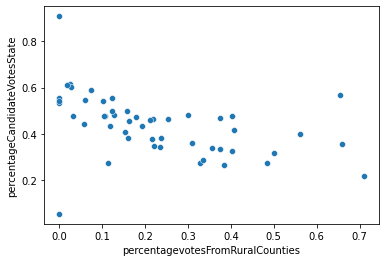

In [113]:
sns.scatterplot(x=rdf.groupby('state').percentagevotesFromRuralCounties.first(), y=rdf.groupby('state').percentageCandidateVotesState.first())



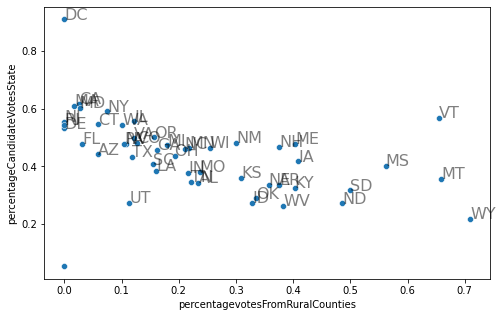

In [116]:

pctVotesRuralS = rdf.groupby('state').percentagevotesFromRuralCounties.first()
pctDemVotesS   = rdf.groupby('state').percentageCandidateVotesState.first()
stateAbbr      = rdf.groupby('state').state_po.first()

plt.figure(figsize=(8,5))
sns.scatterplot(x=pctVotesRuralS,y=pctDemVotesS)
for i in range(len(stateAbbr)):
 plt.text(x=pctVotesRuralS[i],y=pctDemVotesS[i],s=stateAbbr[i], 
          fontdict=dict(color='black', alpha=0.5, size=16))


In [117]:
#candidatevotes sum as candidatevotesRUclass
#  totalvotes sum as totalvotesRUclass
#- add a column to grouped dataframe percentagevotesRUclass =
rdf['ruTotalVotes'] = rdf.groupby('RuralUrbanContinuumCode2013')['totalvotes'].transform('sum')
rdf['ruCandidateVotes'] = rdf.groupby('RuralUrbanContinuumCode2013')['candidatevotes'].transform('sum')
rdf['percentageCandidateVotesRU'] = rdf['ruCandidateVotes'] / rdf['ruTotalVotes']


In [ ]:
# bar chart of percentagevotesRUclass for each RuralUrbanContinuumCode2013

sns.scatterplot(x=rdf.groupby('state').percentagevotesFromRuralCounties.first(), y=rdf.groupby('state').percentageCandidateVotesState.first())


plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")


Text(0.5, 1.0, 'Effect of population density on voting')

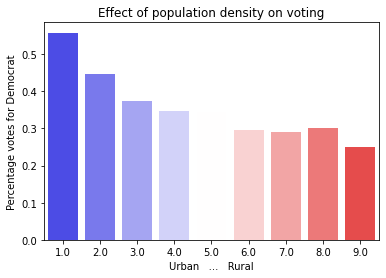

In [125]:
sns.barplot(x=rdf.groupby('RuralUrbanContinuumCode2013').RuralUrbanContinuumCode2013.first(),
            y=rdf.groupby('RuralUrbanContinuumCode2013').percentageCandidateVotesRU.first(),
           palette='bwr')

plt.xlabel("Urban   ...   Rural")
plt.ylabel("Percentage votes for Democrat")
plt.title("Effect of population density on voting")